<a href="https://colab.research.google.com/github/RaisB17/deep_learning/blob/main/week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow RNN model

In [17]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, auc
import matplotlib.pyplot as plt
import numpy as np

In [3]:
num_words = 30000
maxlen = 500
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
model_rnn = Sequential([
    Embedding(num_words, 128, input_length=maxlen),
    SimpleRNN(128, return_sequences=True),
    SimpleRNN(64),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [5]:
history = model_rnn.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 190s 1s/step - accuracy: 0.5113 - loss: 0.7109 - val_accuracy: 0.5054 - val_loss: 0.7098
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.5060 - loss: 0.7047 - val_accuracy: 0.6144 - val_loss: 0.6809
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.6526 - loss: 0.6080 - val_accuracy: 0.6984 - val_loss: 0.5758
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 207s 1s/step - accuracy: 0.7876 - loss: 0.4698 - val_accuracy: 0.8040 - val_loss: 0.4593
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 199s 1s/step - accuracy: 0.7918 - loss: 0.4542 - val_accuracy: 0.7728 - val_loss: 0.4938


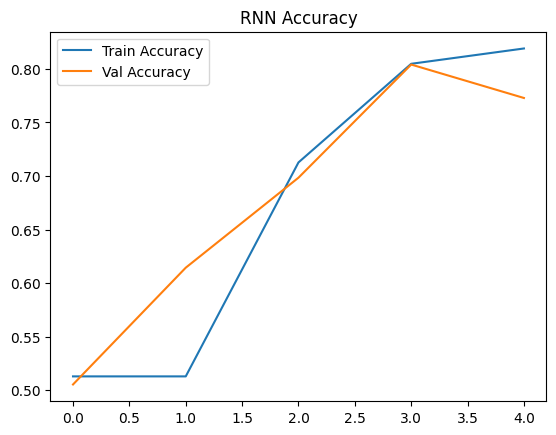

In [6]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('RNN Accuracy')
plt.legend()
plt.show()

782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 90ms/step
              precision    recall  f1-score   support

           0       0.80      0.73      0.76     12500
           1       0.75      0.81      0.78     12500

    accuracy                           0.77     25000
   macro avg       0.77      0.77      0.77     25000
weighted avg       0.77      0.77      0.77     25000



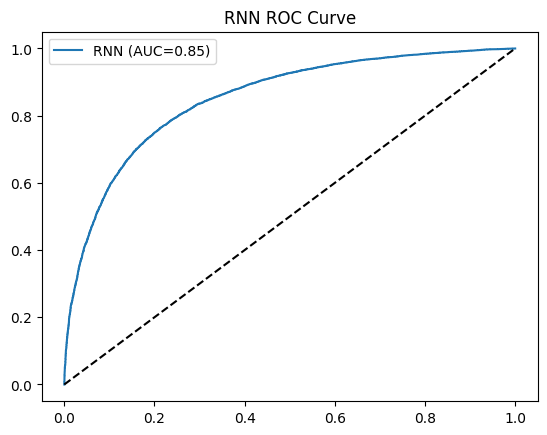

In [11]:
y_pred_prob = model_rnn.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)
print(classification_report(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'RNN (AUC={roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.title("RNN ROC Curve")
plt.legend()
plt.show()

# Tensorflow LSTM

In [12]:
lstm_model = Sequential()
lstm_model.add(Embedding(num_words, 128, input_length=maxlen))
lstm_model.add(LSTM(128, return_sequences=True))
lstm_model.add(LSTM(64))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(64, activation='relu'))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [13]:
history_lstm = lstm_model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 495s 3s/step - accuracy: 0.6647 - loss: 0.5877 - val_accuracy: 0.8198 - val_loss: 0.4153
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 505s 3s/step - accuracy: 0.8860 - loss: 0.2969 - val_accuracy: 0.8762 - val_loss: 0.3035
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 505s 3s/step - accuracy: 0.9456 - loss: 0.1555 - val_accuracy: 0.8736 - val_loss: 0.3368
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 500s 3s/step - accuracy: 0.9687 - loss: 0.0979 - val_accuracy: 0.8574 - val_loss: 0.4121
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 501s 3s/step - accuracy: 0.9779 - loss: 0.0668 - val_accuracy: 0.8732 - val_loss: 0.5672


In [14]:
y_pred_lstm_prob = lstm_model.predict(x_test)
y_pred_lstm = (y_pred_lstm_prob > 0.5).astype(int)

accuracy_lstm = np.mean(y_pred_lstm.flatten() == y_test)
precision_lstm = precision_score(y_test, y_pred_lstm)
recall_lstm = recall_score(y_test, y_pred_lstm)
f1_lstm = f1_score(y_test, y_pred_lstm)
auc_lstm = roc_auc_score(y_test, y_pred_lstm_prob)

782/782 ━━━━━━━━━━━━━━━━━━━━ 276s 352ms/step


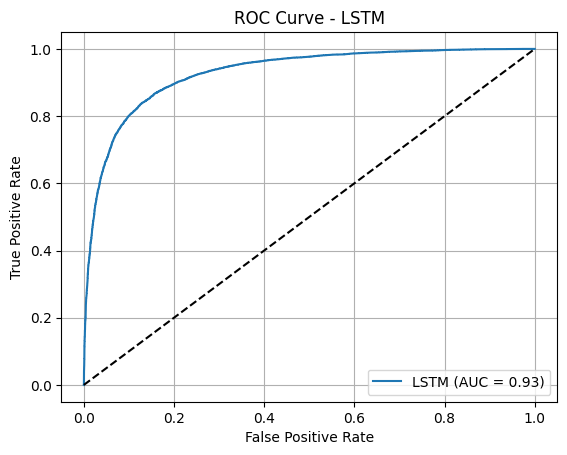

In [15]:
fpr_lstm, tpr_lstm, _ = roc_curve(y_test, y_pred_lstm_prob)
plt.figure()
plt.plot(fpr_lstm, tpr_lstm, label=f'LSTM (AUC = {auc_lstm:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LSTM')
plt.legend()
plt.grid()
plt.show()


In [16]:
print("\n=== 🧾 LSTM Classification Report ===")
print(classification_report(y_test, y_pred_lstm))
print(f"Accuracy: {accuracy_lstm:.4f}, Precision: {precision_lstm:.4f}, Recall: {recall_lstm:.4f}, F1: {f1_lstm:.4f}, AUC: {auc_lstm:.4f}")



=== 🧾 LSTM Classification Report ===
              precision    recall  f1-score   support

           0       0.85      0.86      0.86     12500
           1       0.86      0.85      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000

Accuracy: 0.8545, Precision: 0.8610, Recall: 0.8456, F1: 0.8532, AUC: 0.9282


# Tensorflow GRU

In [18]:
gru_model = Sequential()
gru_model.add(Embedding(num_words, 128, input_length=maxlen))
gru_model.add(GRU(128, return_sequences=True))
gru_model.add(GRU(64))
gru_model.add(Dropout(0.5))
gru_model.add(Dense(64, activation='relu'))
gru_model.add(Dense(1, activation='sigmoid'))
gru_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

gru_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [20]:
history_gru = gru_model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 545s 3s/step - accuracy: 0.6541 - loss: 0.5987 - val_accuracy: 0.7608 - val_loss: 0.4778
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 538s 3s/step - accuracy: 0.8730 - loss: 0.3160 - val_accuracy: 0.8418 - val_loss: 0.3674
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 562s 3s/step - accuracy: 0.9393 - loss: 0.1709 - val_accuracy: 0.8652 - val_loss: 0.3703
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 546s 3s/step - accuracy: 0.9663 - loss: 0.0976 - val_accuracy: 0.8680 - val_loss: 0.4036
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 563s 3s/step - accuracy: 0.9786 - loss: 0.0674 - val_accuracy: 0.8538 - val_loss: 0.4629


In [22]:
y_pred_gru_prob = gru_model.predict(x_test)
y_pred_gru = (y_pred_gru_prob > 0.5).astype(int)

accuracy_gru = np.mean(y_pred_gru.flatten() == y_test)
precision_gru = precision_score(y_test, y_pred_gru)
recall_gru = recall_score(y_test, y_pred_gru)
f1_gru = f1_score(y_test, y_pred_gru)
auc_gru = roc_auc_score(y_test, y_pred_gru_prob)

print("\n=== 🧾 GRU Classification Report ===")
print(classification_report(y_test, y_pred_gru))
print(f"Accuracy: {accuracy_gru:.4f}, Precision: {precision_gru:.4f}, Recall: {recall_gru:.4f}, F1: {f1_gru:.4f}, AUC: {auc_gru:.4f}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 174s 221ms/step

=== 🧾 GRU Classification Report ===
              precision    recall  f1-score   support

           0       0.81      0.89      0.85     12500
           1       0.88      0.79      0.83     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000

Accuracy: 0.8408, Precision: 0.8804, Recall: 0.7887, F1: 0.8321, AUC: 0.9212


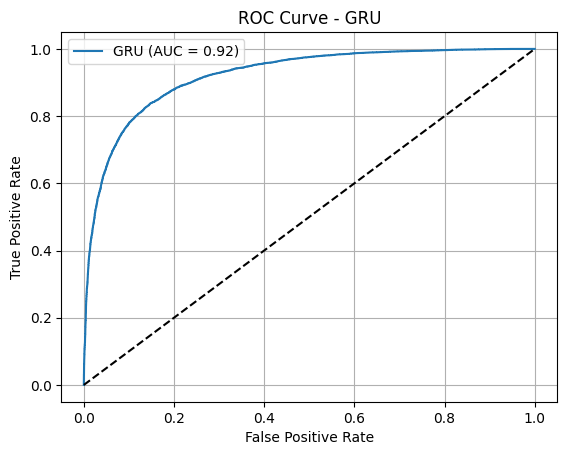

In [23]:
fpr_gru, tpr_gru, _ = roc_curve(y_test, y_pred_gru_prob)
plt.figure()
plt.plot(fpr_gru, tpr_gru, label=f'GRU (AUC = {auc_gru:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - GRU')
plt.legend()
plt.grid()
plt.show()

# Pytorch RNN

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
num_words = 30000
maxlen = 500
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

X_train_tensor = torch.tensor(X_train, dtype=torch.long)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
class RNNModel(nn.Module):
    def __init__(self):
        super(RNNModel, self).__init__()
        self.embedding = nn.Embedding(num_words, 128)
        self.rnn = nn.RNN(128, 128, batch_first=True)
        self.fc1 = nn.Linear(128, 64)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.embedding(x)
        x, _ = self.rnn(x)
        x = x[:, -1, :]
        x = self.dropout(torch.relu(self.fc1(x)))
        x = self.sigmoid(self.fc2(x))
        return x.squeeze()

model_rnn = RNNModel().to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model_rnn.parameters())


In [11]:
train_losses_rnn = []
for epoch in range(15):
    model_rnn.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model_rnn(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    avg_loss = running_loss / len(train_loader)
    train_losses_rnn.append(avg_loss)
    print(f"Epoch {epoch+1}/10, Loss: {avg_loss:.4f}")


Epoch 1/10, Loss: 0.4525
Epoch 2/10, Loss: 0.4237
Epoch 3/10, Loss: 0.3932
Epoch 4/10, Loss: 0.3633
Epoch 5/10, Loss: 0.3321
Epoch 6/10, Loss: 0.3107
Epoch 7/10, Loss: 0.2897
Epoch 8/10, Loss: 0.2840
Epoch 9/10, Loss: 0.2819
Epoch 10/10, Loss: 0.2530
Epoch 11/10, Loss: 0.2330
Epoch 12/10, Loss: 0.2188
Epoch 13/10, Loss: 0.2069
Epoch 14/10, Loss: 0.2135
Epoch 15/10, Loss: 0.2076


In [12]:
model_rnn.eval()
all_preds_rnn, all_probs_rnn, all_targets_rnn = [], [], []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        outputs = model_rnn(inputs)
        all_probs_rnn.extend(outputs.cpu().numpy())
        all_preds_rnn.extend((outputs > 0.5).int().cpu().numpy())
        all_targets_rnn.extend(labels.numpy())

print("\n=== 🧾 RNN Classification Report ===")
print(classification_report(all_targets_rnn, all_preds_rnn))
print("AUC:", roc_auc_score(all_targets_rnn, all_probs_rnn))



=== 🧾 RNN Classification Report ===
              precision    recall  f1-score   support

         0.0       0.74      0.75      0.75     12500
         1.0       0.75      0.74      0.75     12500

    accuracy                           0.75     25000
   macro avg       0.75      0.75      0.75     25000
weighted avg       0.75      0.75      0.75     25000

AUC: 0.8131571648


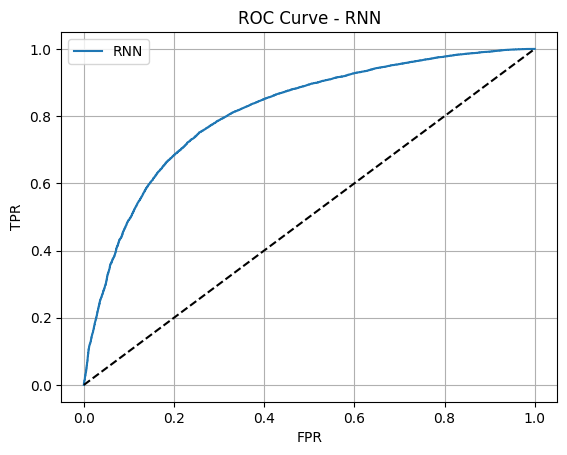

In [13]:
fpr_rnn, tpr_rnn, _ = roc_curve(all_targets_rnn, all_probs_rnn)
plt.plot(fpr_rnn, tpr_rnn, label='RNN')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - RNN")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.grid()
plt.show()

# Pytorch LSTM

In [14]:
class LSTMModel(nn.Module):
    def __init__(self):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(num_words, 128)
        self.lstm = nn.LSTM(128, 128, batch_first=True)
        self.fc1 = nn.Linear(128, 64)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.embedding(x)
        x, _ = self.lstm(x)
        x = x[:, -1, :]
        x = self.dropout(torch.relu(self.fc1(x)))
        x = self.sigmoid(self.fc2(x))
        return x.squeeze()

model_lstm = LSTMModel().to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model_lstm.parameters())

In [16]:
train_losses_lstm = []
for epoch in range(10):
    model_lstm.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model_lstm(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    avg_loss = running_loss / len(train_loader)
    train_losses_lstm.append(avg_loss)
    print(f"Epoch {epoch+1}/5, Loss: {avg_loss:.4f}")

Epoch 1/5, Loss: 0.1886
Epoch 2/5, Loss: 0.1382
Epoch 3/5, Loss: 0.1266
Epoch 4/5, Loss: 0.1067
Epoch 5/5, Loss: 0.0557
Epoch 6/5, Loss: 0.0377
Epoch 7/5, Loss: 0.0427
Epoch 8/5, Loss: 0.0173
Epoch 9/5, Loss: 0.0189
Epoch 10/5, Loss: 0.0142


In [17]:
model_lstm.eval()
all_preds_lstm, all_probs_lstm, all_targets_lstm = [], [], []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        outputs = model_lstm(inputs)
        all_probs_lstm.extend(outputs.cpu().numpy())
        all_preds_lstm.extend((outputs > 0.5).int().cpu().numpy())
        all_targets_lstm.extend(labels.numpy())

print("\n=== 🧾 LSTM Classification Report ===")
print(classification_report(all_targets_lstm, all_preds_lstm))
print("AUC:", roc_auc_score(all_targets_lstm, all_probs_lstm))



=== 🧾 LSTM Classification Report ===
              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84     12500
         1.0       0.84      0.84      0.84     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000

AUC: 0.9162577376


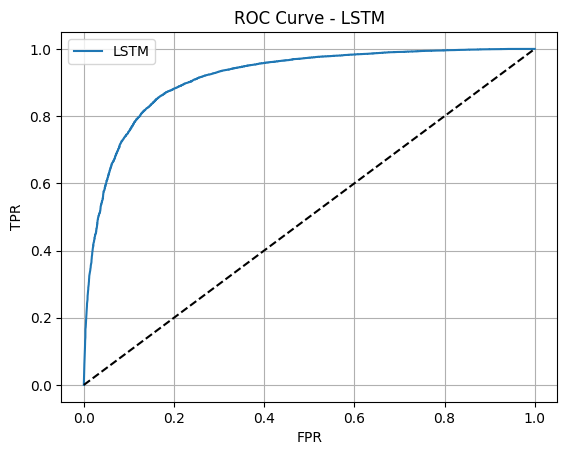

In [18]:
fpr_lstm, tpr_lstm, _ = roc_curve(all_targets_lstm, all_probs_lstm)
plt.plot(fpr_lstm, tpr_lstm, label='LSTM')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - LSTM")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.grid()
plt.show()

# Pytorch GRU

In [24]:
class GRUModel(nn.Module):
    def __init__(self):
        super(GRUModel, self).__init__()
        self.embedding = nn.Embedding(num_words, 128)
        self.gru = nn.GRU(128, 128, batch_first=True)
        self.fc1 = nn.Linear(128, 64)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.embedding(x)
        x, _ = self.gru(x)
        x = x[:, -1, :]
        x = self.dropout(torch.relu(self.fc1(x)))
        x = self.sigmoid(self.fc2(x))
        return x.squeeze()

model_gru = GRUModel().to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model_gru.parameters())

In [25]:
train_losses_gru = []
for epoch in range(8):
    model_gru.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model_gru(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    avg_loss = running_loss / len(train_loader)
    train_losses_gru.append(avg_loss)
    print(f"Epoch {epoch+1}/8, Loss: {avg_loss:.4f}")

Epoch 1/8, Loss: 0.6005
Epoch 2/8, Loss: 0.4847
Epoch 3/8, Loss: 0.3457
Epoch 4/8, Loss: 0.2383
Epoch 5/8, Loss: 0.1761
Epoch 6/8, Loss: 0.1257
Epoch 7/8, Loss: 0.0884
Epoch 8/8, Loss: 0.0557


In [26]:
model_gru.eval()
all_preds_gru, all_probs_gru, all_targets_gru = [], [], []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        outputs = model_gru(inputs)
        all_probs_gru.extend(outputs.cpu().numpy())
        all_preds_gru.extend((outputs > 0.5).int().cpu().numpy())
        all_targets_gru.extend(labels.numpy())

print("\n=== 🧾 GRU Classification Report ===")
print(classification_report(all_targets_gru, all_preds_gru))
print("AUC:", roc_auc_score(all_targets_gru, all_probs_gru))


=== 🧾 GRU Classification Report ===
              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87     12500
         1.0       0.88      0.86      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000

AUC: 0.9396381536


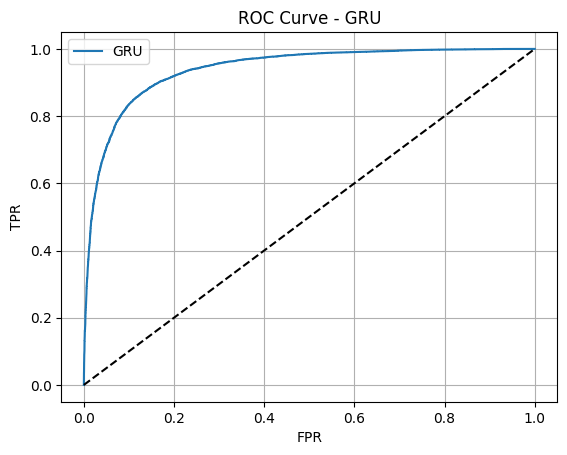

In [27]:
fpr_gru, tpr_gru, _ = roc_curve(all_targets_gru, all_probs_gru)
plt.plot(fpr_gru, tpr_gru, label='GRU')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - GRU")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.grid()
plt.show()